In [1]:
# imports
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Matplotlib basics

### A simple sine/cosine plot

- Create a `numpy` array named `X` with 256 values ranging from -Pi to +Pi 

In [2]:
X = np.arange(-np.pi , np.pi, 2*np.pi/256)

- Create two arrays `C`, `S` with values for the sine/cosine of `X`

In [3]:
C = np.cos(X)
S = np.sin(X)

- Plot both curves in one plot using defaults

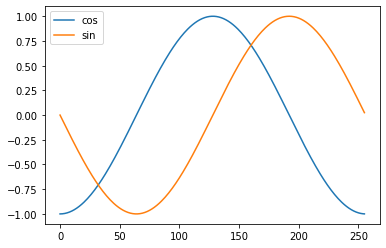

In [4]:
fig = plt.figure()
plt.plot(C)
plt.plot(S)
plt.legend(['cos','sin'])
plt.show()

- Change the color of the cosine curve to black, and the sine curve to red
- Increase the line width of both curves, and the line style of the sine curve to dotted

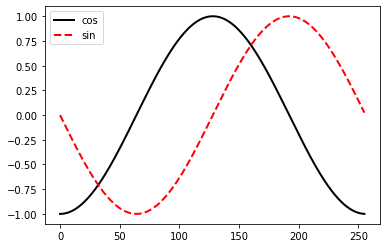

In [5]:
fig = plt.figure()
plt.plot(C, 'k', linewidth=2)
plt.plot(S, '--r', linewidth=2)
plt.legend(['cos','sin'])
plt.show()

- Plot the sine and cosine values against each other. If you can recover your high school trigonometry memories: what do you expect to see?

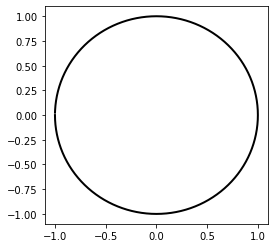

In [6]:
fig = plt.figure(figsize=(4,4))
plt.plot(C, S, 'k', linewidth=2)
plt.show()

## Exercise: Plot the Normal Distribution

### Task 1: Try to reproduce the following plot
This is a plot of four different Gaussian distributions from Wikipedia. It was created with a different plotting library, so we aren't aiming to create a perfect 1:1 reproduction. The curves, legend, axis labels, gridlines and at least some kind of major and minor ticks will be enough.

If you want to avoid implementing a Gaussian probability density function from scratch, you can find one in the package `scipy.stats`.

Find out how to put greek letters in labels. Matplotlib supports TeX-like markup.

<img src='normal.png'>

In [7]:
from scipy.stats import norm
x = np.linspace(-5, 5, 100)
params = [(0, 0.2, 'blue'), (0, 1.0, 'red'), (0, 5, 'yellow'), (-2, 0.5, 'green')]
dists = []

# for loop puting parameters
for mean, var, color in params:
    dist = norm(mean, np.sqrt(var))
    dists.append(dist)
    
# dists = [norm(mean, np.sqrt(var)) for mean, var, color in params]

Text(0, 0.5, '$\\varphi_{\\mu, \\sigma}$(X)')

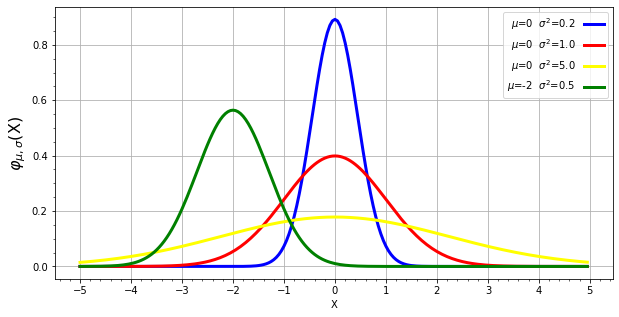

In [8]:
plt.figure(figsize=(10,5))

x = np.arange(-5, 5, 0.05)

for ((mean, variance, color), dist) in zip(params, dists):
    y = dist.pdf(x)
    plt.plot(x, y, color=color, label=f'$\mu$={mean}  $\sigma^2$={variance:.1f}', linewidth=3)
    
plt.legend(markerfirst=False)
plt.grid()
plt.xticks(np.arange(-5, 5.1, 1))
plt.minorticks_on()
plt.xlabel('X')
plt.ylabel(r'$\varphi_{\mu, \sigma}$(X)', fontsize=16)

### Task 2: Plot the above distributions as box-plots

In order to turn these probability density functions into values coming from the distributions they represent, you will either have to generate a lot of random numbers for each distribution with `np.random`, or sample them evenly based on their cumulative distribution function. The second approach may require a bit more planning, but it will result in a "cleaner" plot.

Create a `DataFrame` with four columns (one per distribution) and 1000 rows containing the random (or evenly sampled) values, and create a boxplot out of it. You can either use pandas' integrated plotting capabilities, or use `matplotlib` or even the package `seaborn`.

c:\python37\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


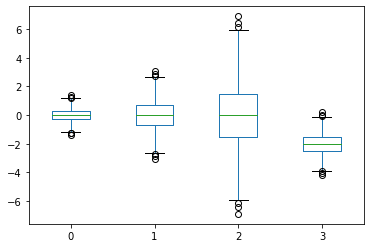

In [9]:
import seaborn as sns

x = np.linspace(0, 1, 1000)

# inverse of cdf
df_evenly = pd.DataFrame([dist.ppf(x) for dist in dists]).T
df_random = pd.DataFrame([dist.rvs(1000) for dist in dists]).T
df = df_evenly

# plot boxplot with ppf
df.plot(kind='box')

## other way to do ##
# sns.boxplot(data=df)
# plt.boxplot(df.values);  # if matplotlib boxplot gets a 2d np array, it plots them column-wise, otherwise all values pooled. DF is not a numpy matrix, but it can be accessed as such.

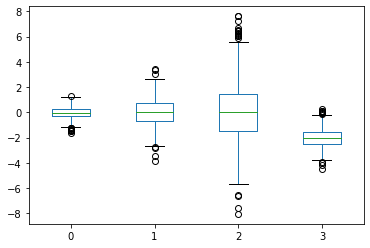

In [10]:
# plot boxplot with rvs
df = df_random
df.plot(kind='box')

### Task 3: ... and as histograms

For this task we strongly suggest the use of `matplotlib`, your job will be easier than with any other package.

To have visual consistency and identical scaling among the histograms, make sure you use identical binning for all four histograms, instead of leaving every setting on default. Set a transparent alpha channel so that the different histograms don't fully occlude each other.

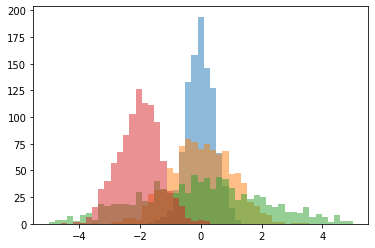

In [11]:
# plot histogram
bins = np.linspace(-5, 5, 50)
for _, column in df.items():
    plt.hist(column, alpha=0.5, bins=bins)

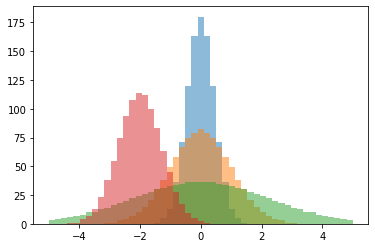

In [12]:
# plot histogram
df = df_evenly
bins = np.linspace(-5, 5, 50)
for _, column in df.items():
    plt.hist(column, alpha=0.5, bins=bins)

### Bonus task: Plot the distributions as a heatmap

If we had had more than just four distributions to plot, the histogram would quickly become too crowded and hard to read. A potential alternative to a set of histograms would be a heatmap, where each row would contain the binned values of the previous histograms.

You can try to tweak your data such that you can use `np.histogram2d` to calculate the necessary input for `plt.imshow` or `sns.heatmap`. But you can also roll your own solution by building a matrix directly from the individual 1-dimensional histogram.

In [13]:
df[1:999].values.flatten()

array([-1.38186101, -3.08993515, -6.90930505, ...,  3.08993515,
        6.90930505,  0.1849141 ])

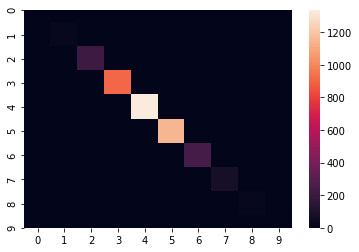

In [14]:
sns.heatmap(np.histogram2d(df[1:999].values.flatten(),df[1:999].values.flatten())[0])